**Title of ML Project:** Apartment Rent Price Prediction Model

---

**Name:** Althaf N

**Organization:** Entri Elevate

**Date:** [Evaluation Date]

---

### 1. Overview of Problem Statement:

The housing rental market is dynamic and complex, influenced by multiple factors such as location, property features, and market conditions. Predicting apartment rent prices accurately can benefit property owners, tenants, and investors. This project focuses on developing a machine learning model to predict apartment rental prices based on various property attributes.

### 2. Objective:

To develop an accurate apartment rent price prediction model using machine learning techniques.

### 3. Data Description:

- **Source:** UCI Machine Learning Repository
- **Features:**
  - Square Feet
  - Bathrooms
  - Bedrooms
  - Latitude
  - Longitude
  - Price (Target variable)

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier

In [6]:
# Load dataset
df = pd.read_csv('apartment_for_rent .csv')
print(df.shape)
df.head()

(99826, 21)


,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1,1,USD,No,Thumbnail,Cats,...,2195,Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1.577360e+09
1,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3,USD,No,Thumbnail,"Cats,Dogs",...,1250,Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1.577360e+09
2,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2,3,USD,No,Thumbnail,NaN,...,1395,Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1.577360e+09
3,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1,2,USD,No,Thumbnail,"Cats,Dogs",...,1600,Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1.577360e+09
4,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1,1,USD,No,Thumbnail,"Cats,Dogs",...,975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1.577360e+09


In [7]:
df.tail()

,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
99821,housing/rent/apartment,Houston - superb Apartment nearby fine dining,"Redefining urban living, in southeast Houston,...","Gym,Parking,Patio/Deck,Playground,Storage,Wood...",1.0,1.0,USD,No,Yes,NaN,...,780,Monthly,605,NaN,Houston,TX,29.6151,-95.1998,RentDigs.com,1.544186e+09
99822,housing/rent/apartment,The Best of the Best in the City of Jacksonvil...,Courtney Manor Apartments offer the best of ev...,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gym...",2.0,2.0,USD,No,Yes,"Cats,Dogs",...,813,Monthly,921,NaN,Jacksonville,FL,30.2254,-81.7579,RentDigs.com,1.544186e+09
99823,housing/rent/apartment,A great & large One BR apartment. Pet OK!,"Fully remodeled, new floor, kitchen cabinet, s...","Garbage Disposal,Refrigerator",1.0,1.0,USD,No,Yes,"Cats,Dogs",...,1325,Monthly,650,NaN,San Diego,CA,32.7379,-117.0914,RentDigs.com,1.544186e+09
99824,housing/rent/apartment,"The Crest offers studio, 1, 2 & Three BR homes...","Amenities include a fitness facilities, swimmi...","Gym,Pool",1.0,1.0,USD,No,Yes,"Cats,Dogs",...,931,Monthly,701,NaN,Huntersville,NC,35.4158,-80.8451,RentDigs.com,1.544186e+09
99825,housing/rent/apartment,Large Remodeled Two BR 1. Five BA Apartment Home,This is a brand new 2 Beds 1. five Bathrooms A...,"Gated,Parking,Wood Floors",1.5,2.0,USD,No,Yes,NaN,...,1595,Monthly,900,NaN,San Diego,CA,32.7379,-117.0914,RentDigs.com,1.544186e+09


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99826 entries, 0 to 99825
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   category       99826 non-null  object 
 1   title          99826 non-null  object 
 2   body           99826 non-null  object 
 3   amenities      83749 non-null  object 
 4   bathrooms      99760 non-null  object 
 5   bedrooms       99699 non-null  object 
 6   currency       99822 non-null  object 
 7   fee            99823 non-null  object 
 8   has_photo      99823 non-null  object 
 9   pets_allowed   39192 non-null  object 
 10  price          99821 non-null  float64
 11  price_display  99820 non-null  object 
 12  price_type     99823 non-null  object 
 13  square_feet    99823 non-null  object 
 14  address        7946 non-null   object 
 15  cityname       99521 non-null  object 
 16  state          99521 non-null  object 
 17  latitude       99797 non-null  float64
 18  longit

In [9]:
# Display the data types of each column in the DataFrame
df.dtypes

category          object
title             object
body              object
amenities         object
bathrooms         object
bedrooms          object
currency          object
fee               object
has_photo         object
pets_allowed      object
price            float64
price_display     object
price_type        object
square_feet       object
address           object
cityname          object
state             object
latitude         float64
longitude        float64
source            object
time             float64
dtype: object

In [10]:
# Check for missing values
df.isnull().sum()

category             0
title                0
body                 0
amenities        16077
bathrooms           66
bedrooms           127
currency             4
fee                  3
has_photo            3
pets_allowed     60634
price                5
price_display        6
price_type           3
square_feet          3
address          91880
cityname           305
state              305
latitude            29
longitude           31
source               6
time                 6
dtype: int64

In [11]:
# Display the list of column names in the DataFrame
df.columns

Index(['category', 'title', 'body', 'amenities', 'bathrooms', 'bedrooms',
       'currency', 'fee', 'has_photo', 'pets_allowed', 'price',
       'price_display', 'price_type', 'square_feet', 'address', 'cityname',
       'state', 'latitude', 'longitude', 'source', 'time'],
      dtype='object')

### 5. Data Preprocessing - Data Cleaning:

In [13]:
df.shape

(99826, 21)

In [14]:
df.describe()

,price,latitude,longitude,time
count,99821.000000,9.979700e+04,99795.000000,9.982000e+04
mean,1527.208493,3.147604e+04,-91.562177,1.559690e+09
std,903.635759,7.022820e+06,15.819296,1.104487e+07
min,100.000000,1.957380e+01,-159.369800,1.544174e+09
25%,1014.000000,3.374960e+01,-104.791900,1.550832e+09
50%,1350.000000,3.722970e+01,-84.562300,1.568745e+09
75%,1795.000000,3.995390e+01,-77.585300,1.568767e+09
max,52500.000000,1.568782e+09,-68.778800,1.577391e+09


In [15]:
#Filling Missing Values in Categorical Columns
categorical_cols = ['amenities', 'pets_allowed', 'currency', 'fee', 'has_photo', 
                    'price_display', 'price_type', 'source', 'address', 'cityname', 'state']

df[categorical_cols] = df[categorical_cols].fillna("Unknown")
#Filling Missing Values in Numerical Columns
# Convert object-type numeric columns to float
df['bathrooms'] = pd.to_numeric(df['bathrooms'], errors='coerce')
df['bedrooms'] = pd.to_numeric(df['bedrooms'], errors='coerce')
df['square_feet'] = pd.to_numeric(df['square_feet'], errors='coerce')

# Fill missing values with mean
num_cols = ['price', 'bathrooms', 'bedrooms', 'square_feet', 'latitude', 'longitude']
for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)

In [16]:
#Dropping Columns with Too Many Missing Values
df.drop(columns=['address'], inplace=True)
#Removing Duplicates
df.drop_duplicates(inplace=True)

In [17]:
df.isnull().sum()

category         0
title            0
body             0
amenities        0
bathrooms        0
bedrooms         0
currency         0
fee              0
has_photo        0
pets_allowed     0
price            0
price_display    0
price_type       0
square_feet      0
cityname         0
state            0
latitude         0
longitude        0
source           0
time             6
dtype: int64

In [18]:
df.duplicated().sum()

0

In [19]:
# Select numerical columns
numerical_features = df.select_dtypes(include=['int64', 'float64'])
# Display numerical columns
print("Numerical Features:\n", numerical_features.columns)
# Display first five rows of numerical features
numerical_features.head()

Numerical Features:
 Index(['bathrooms', 'bedrooms', 'price', 'square_feet', 'latitude',
       'longitude', 'time'],
      dtype='object')


,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
0,1.0,1.0,2195.0,542.0,33.8520,-118.3759,1.577360e+09
1,1.5,3.0,1250.0,1500.0,37.0867,-76.4941,1.577360e+09
2,2.0,3.0,1395.0,1650.0,35.8230,-78.6438,1.577360e+09
3,1.0,2.0,1600.0,820.0,38.3622,-121.9712,1.577360e+09
4,1.0,1.0,975.0,624.0,35.1038,-106.6110,1.577360e+09


# 6. Exploratory Data Analysis (EDA)

    Gain insights into the data distribution, relationships, and potential patterns.
    Visualizations: Histogram, Boxplot, Pair Plot, Heatmap Correlation, Bar Plot

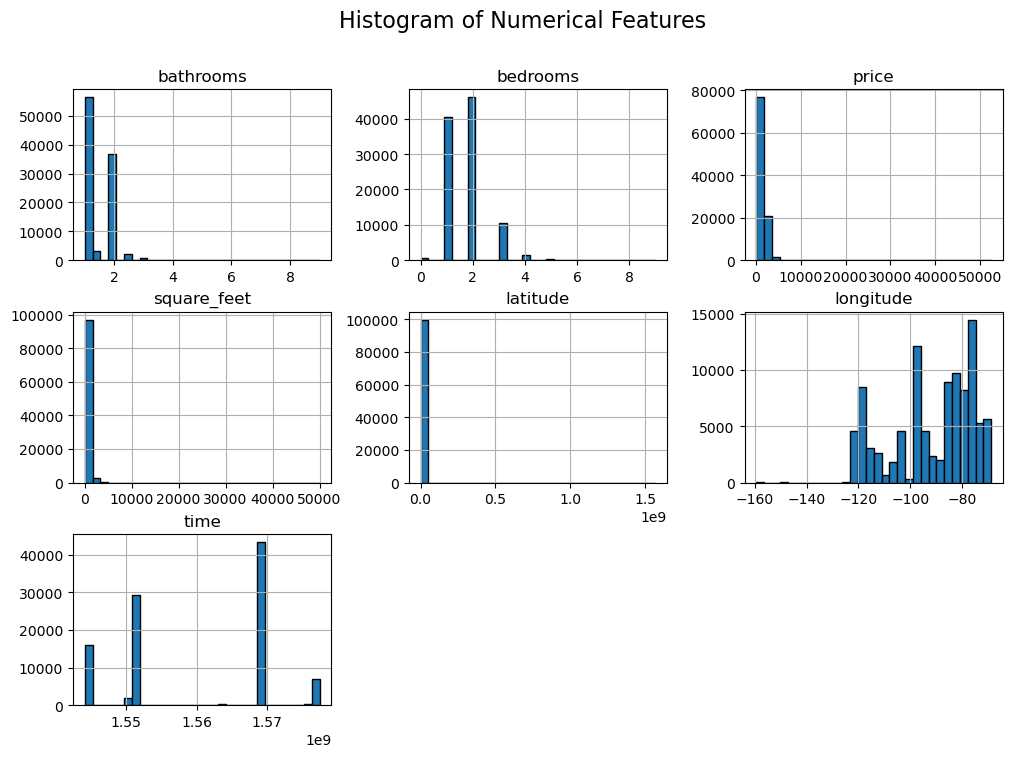

In [21]:
# Plot histograms for numerical features
numerical_features.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Histogram of Numerical Features", fontsize=16)
plt.show()

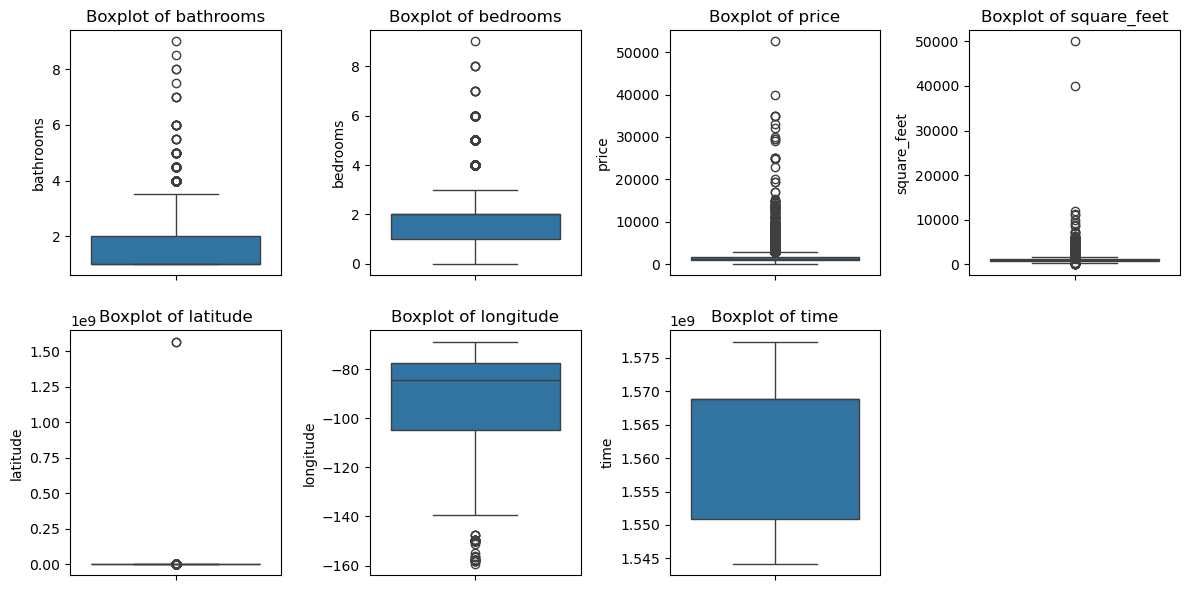

In [22]:
plt.figure(figsize=(12, 6))

# Plot boxplots for numerical features
for i, col in enumerate(numerical_features.columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

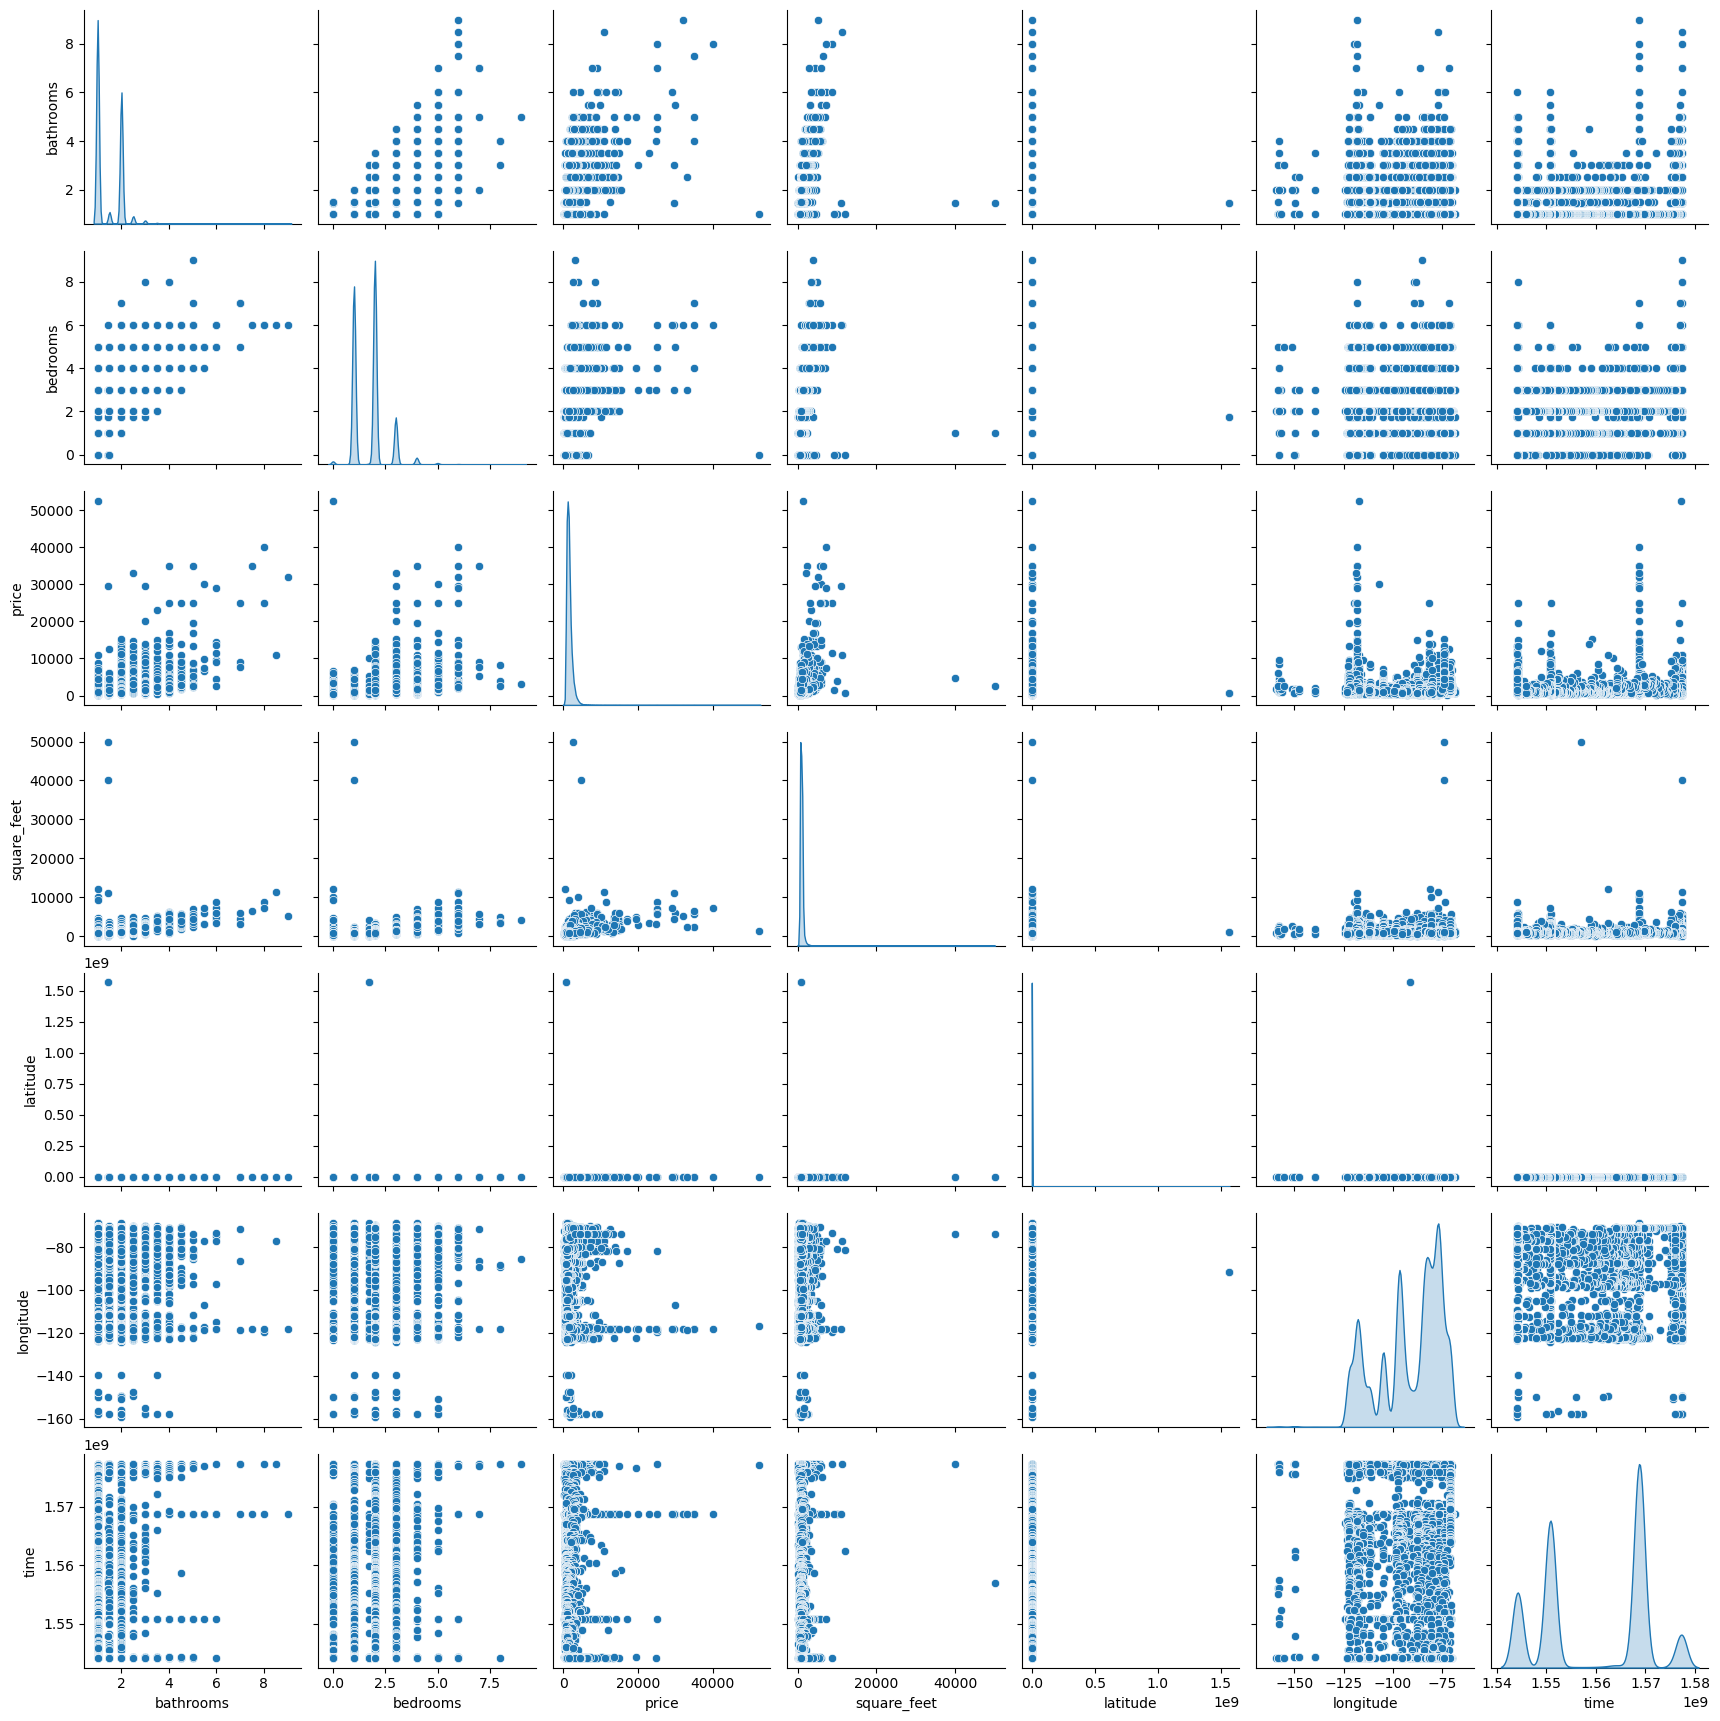

In [23]:
#Pair Plot
sns.pairplot(numerical_features, diag_kind="kde")
plt.show()

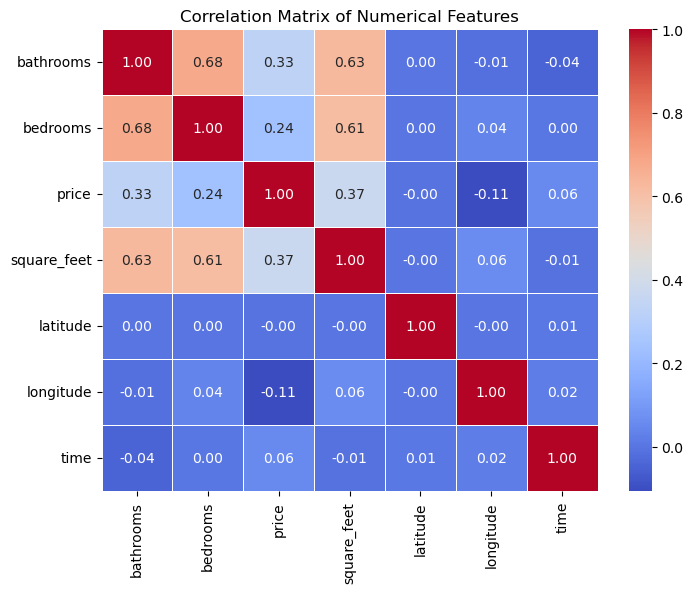

In [24]:
#Heatmap 
plt.figure(figsize=(8,6))
sns.heatmap(numerical_features.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

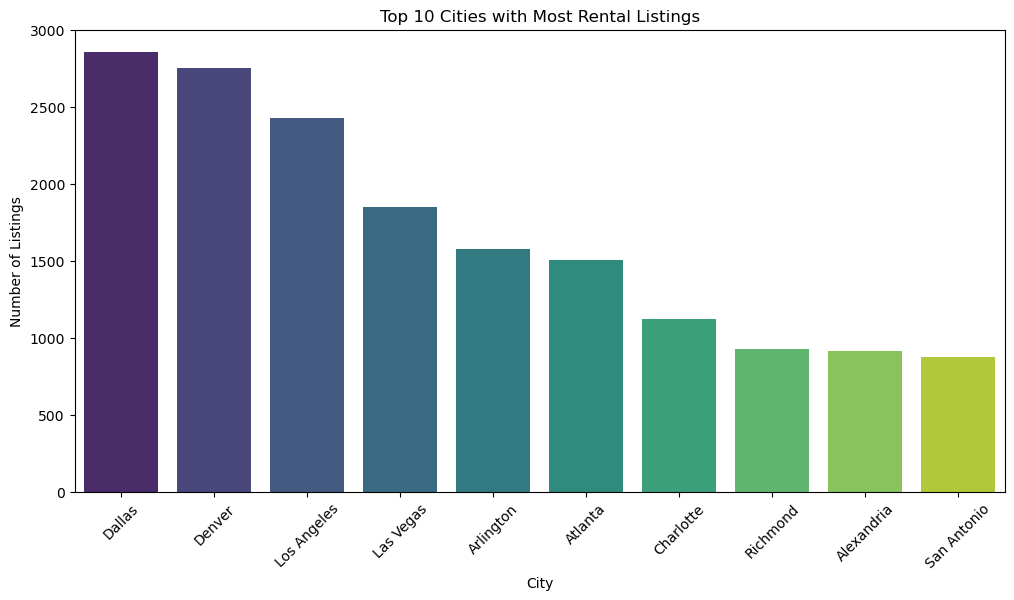

In [25]:
#Bar Plot 
plt.figure(figsize=(12,6))
top_cities = df['cityname'].value_counts().nlargest(10)  # Top 10 most frequent cities
sns.barplot(x=top_cities.index, y=top_cities.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("City")
plt.ylabel("Number of Listings")
plt.title("Top 10 Cities with Most Rental Listings")
plt.show()

In [74]:
# Select numerical features only
numerical_features = df.select_dtypes(include=['number'])
# Function to remove outliers using IQR method
def remove_outliers_iqr(df, threshold=1.2):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df < (Q1 - threshold * IQR)) | (df > (Q3 + threshold * IQR))).any(axis=1)]
    # Selecting only numerical columns
    df_numeric = df.select_dtypes(include=[np.number])
    # Create a copy to avoid modifying the original data
    df_cleaned = df_numeric.copy()
    for column in df_numeric.columns:
        Q1 = df_numeric[column].quantile(0.25)
        Q3 = df_numeric[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    
    return df_cleaned

In [76]:
# Remove outliers using IQR method
df_cleaned = remove_outliers_iqr(numerical_features)

In [78]:
from scipy.stats import zscore
def remove_outliers_zscore(df, threshold=3):
    z_scores = np.abs(zscore(df))
    return df[(z_scores < threshold).all(axis=1)]


In [80]:
# Assuming `df` is your original dataset
df_cleaned = remove_outliers_zscore(df_cleaned)

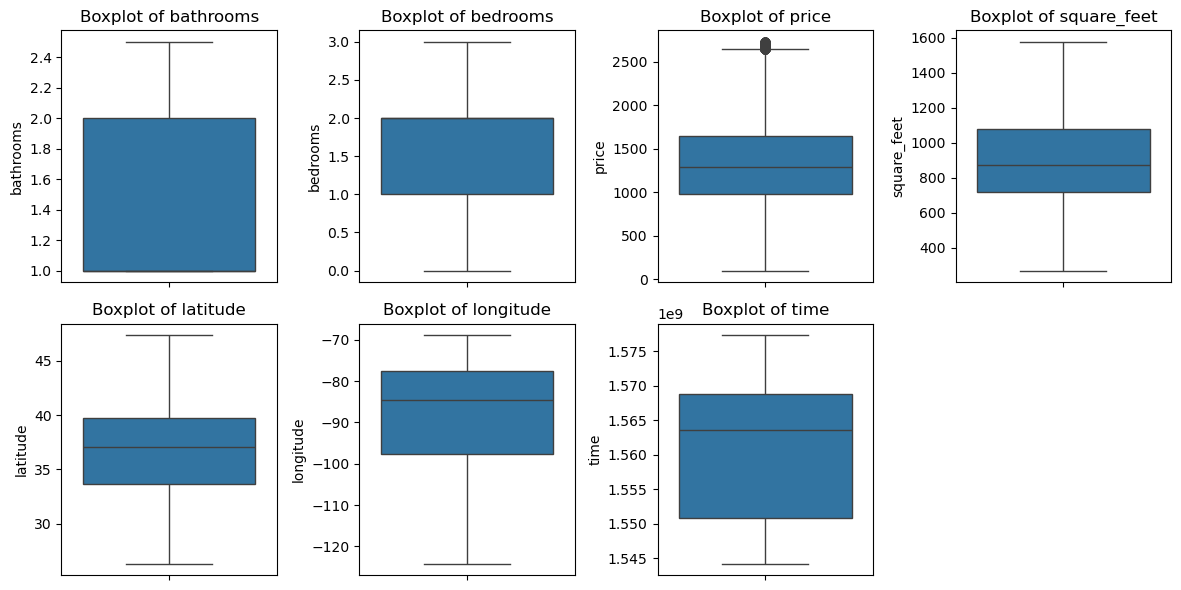

In [82]:
# Plot boxplots after outlier removal
plt.figure(figsize=(12, 6))
for i, column in enumerate(df_cleaned.columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df_cleaned[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [83]:
# Selecting only numerical features from the dataset
df1 = df_cleaned.select_dtypes(include=['number'])
# Display the first few rows
df1

,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
0,1.0,1.0,2195.0,542.0,33.8520,-118.3759,1.577360e+09
1,1.5,3.0,1250.0,1500.0,37.0867,-76.4941,1.577360e+09
3,1.0,2.0,1600.0,820.0,38.3622,-121.9712,1.577360e+09
4,1.0,1.0,975.0,624.0,35.1038,-106.6110,1.577360e+09
5,1.5,2.0,1250.0,965.0,35.1038,-106.6110,1.577360e+09
...,...,...,...,...,...,...,...
99821,1.0,1.0,780.0,605.0,29.6151,-95.1998,1.544186e+09
99822,2.0,2.0,813.0,921.0,30.2254,-81.7579,1.544186e+09
99823,1.0,1.0,1325.0,650.0,32.7379,-117.0914,1.544186e+09
99824,1.0,1.0,931.0,701.0,35.4158,-80.8451,1.544186e+09


# Feature Selection

In [85]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import PowerTransformer

# Separate features and target
X = df1.drop(columns=['price'])
y = df1['price'] 

In [86]:
#feature selection
sk = SelectKBest(score_func = f_regression,k=10)
X_new = sk.fit_transform(X,y)
X_selected = X.columns[sk.get_support()]
print("Selected Features")
print(X_selected)
feature_score = pd.DataFrame({'Feature':X.columns,'Score': sk.scores_}).sort_values(by = 'Score',ascending = False)
print(feature_score)

Selected Features
Index(['bathrooms', 'bedrooms', 'square_feet', 'latitude', 'longitude',
       'time'],
      dtype='object')
       Feature        Score
2  square_feet  8467.294499
0    bathrooms  4966.273738
1     bedrooms  2141.731992
3     latitude  1543.060308
4    longitude    71.038609
5         time    54.013676


In [87]:
# Applying Yeo-Johnson Power Transformation
pt = PowerTransformer(method = 'yeo-johnson')
X_transformed = pt.fit_transform(df1)

In [88]:
# Converting transformed data back into a DataFrame
df2 = pd.DataFrame(X_transformed, columns = df1.columns )

In [89]:
# Calculating skewness for each numerical feature
df1.skew()

bathrooms      0.543949
bedrooms       0.372304
price          0.636064
square_feet    0.241967
latitude      -0.198195
longitude     -0.648481
time          -0.015303
dtype: float64

In [90]:
df2.nunique()

bathrooms          5
bedrooms           5
price           2287
square_feet     1277
latitude        6439
longitude       6492
time           68512
dtype: int64

In [91]:
# Extract transformed target variable
y_transformed = df2['price']
# Extract only the selected features from the transformed dataset
df3 = df2[X_selected]

# Display the final dataset shape
print("Shape of X_final:", df3.shape)
print("First few rows of transformed features:\n", df3.head())

Shape of X_final: (87044, 6)
First few rows of transformed features:
    bathrooms  bedrooms  square_feet  latitude  longitude      time
0  -0.805175 -1.001969    -1.545486 -0.716324  -1.581979  1.659799
1   0.675198  1.864472     2.245670  0.042951   1.043309  1.659798
2  -0.805175  0.619277    -0.276130  0.354187  -1.696242  1.659797
3  -0.805175 -1.001969    -1.148537 -0.427653  -1.129016  1.659795
4   0.675198  0.619277     0.316318 -0.427653  -1.129016  1.659795


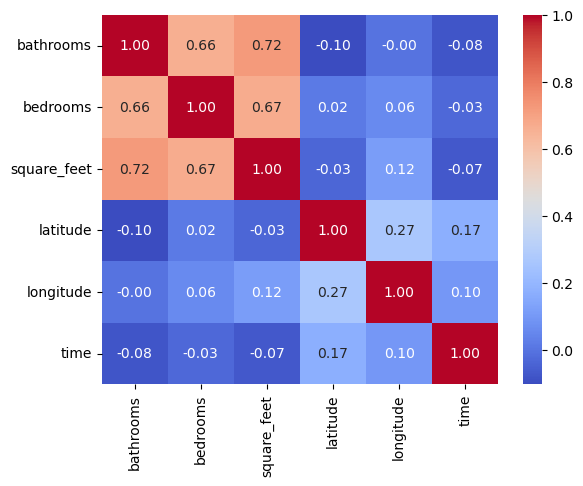

In [92]:
# Compute the correlation matrix for the selected features
correlation = df3.corr()
# Create a heatmap to visualize the correlation between numerical features
sns.heatmap(correlation,annot = True,cmap = 'coolwarm',fmt = '0.2f')
plt.show()

# Feature Scaling

In [115]:
from sklearn.preprocessing import StandardScaler

In [119]:
# Initialize the StandardScaler
scaler = StandardScaler()
# Apply standard scaling to the selected features
X_scaled = scaler.fit_transform(df3) 

In [121]:
# Convert to DataFrame for better readability
X_scaled_df = pd.DataFrame(X_scaled, columns=df3.columns)
# Display first few rows
print(X_scaled_df.head())

   bathrooms  bedrooms  square_feet  latitude  longitude      time
0  -0.805175 -1.001969    -1.545486 -0.716324  -1.581979  1.659799
1   0.675198  1.864472     2.245670  0.042951   1.043309  1.659798
2  -0.805175  0.619277    -0.276130  0.354187  -1.696242  1.659797
3  -0.805175 -1.001969    -1.148537 -0.427653  -1.129016  1.659795
4   0.675198  0.619277     0.316318 -0.427653  -1.129016  1.659795


In [124]:
from sklearn.model_selection import train_test_split
# Splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [126]:
# Displaying the shape of the training and testing sets
print(f"Training set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing set shape: X_test: {X_test.shape}, y_test: {y_test.shape}")

Training set shape: X_train: (69635, 6), y_train: (69635,)
Testing set shape: X_test: (17409, 6), y_test: (17409,)


# Build the ML Model

In [129]:
# Import Required Libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [131]:
# Define a dictionary with different regression models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Support Vector Regression": SVR(kernel='rbf'),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
    "AdaBoost": AdaBoostRegressor(n_estimators=50, learning_rate=0.1, random_state=42)
}
# Dictionary to store results
results = {}

In [133]:
# Loop through each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions on test data
    y_pred = model.predict(X_test)
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    # Store results
    results[model_name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R² Score': r2}

# Understanding Results
Lower MAE, MSE, RMSE → Better model performance

Higher R² (closer to 1) → Model explains more variance in data

Random Forest / Gradient Boosting tend to perform well on structured dat

In [135]:
# Convert results dictionary to DataFrame for better visualization
results_df = pd.DataFrame(results).T
# Display results sorted by lowest RMSE
print(results_df)

                                  MAE            MSE        RMSE  R² Score
Linear Regression          363.191859  209796.862607  458.035875  0.115779
Decision Tree              153.757998   65820.414412  256.554896  0.722590
Support Vector Regression  312.363466  162518.792836  403.136196  0.315039
Random Forest              124.719612   36926.109138  192.161674  0.844369
Gradient Boosting          226.189447   87679.360739  296.107009  0.630462
MLP Regressor              279.649169  129941.717846  360.474296  0.452341
AdaBoost                   297.823261  137701.423982  371.081425  0.419636


In [137]:
# Sort models by R² score in descending order and Extract the best-performing model (first row after sorting)
best_model = results_df.sort_values(by= 'R² Score',ascending = False).iloc[0]
# Display the best model name and its evaluation metrics
print("Best model is")
print(best_model)

Best model is
MAE           124.719612
MSE         36926.109138
RMSE          192.161674
R² Score        0.844369
Name: Random Forest, dtype: float64


# Hyperparameter Tuning and Pipeline

In [139]:
# Define a hyperparameter grid for tuning RandomForestRegressor
param_grid = {
    'n_estimators': [100,200],  
    'max_depth': [10, 20],  
    'min_samples_split': [2, 5],  
    'min_samples_leaf': [1, 2],  
    'max_features': ['sqrt']
}

In [140]:
# Initialize the RandomForestRegressor model with a fixed random state for reproducibility
rf = RandomForestRegressor(random_state=42)

In [141]:
from sklearn.model_selection import GridSearchCV
# Perform GridSearchCV to tune hyperparameters of the RandomForestRegressor
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring= 'r2', n_jobs=2)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=2,
             param_grid={'max_depth': [10, 20], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='r2')

In [142]:
# Print the best hyperparameters found during GridSearchCV
print("Best Parameters:", grid_search.best_params_)
# Print the best R² score achieved with the best parameters
print("Best R² Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best R² Score: 0.8357138412028183


In [143]:
# Get the best model with optimized hyperparameters
best_rf = grid_search.best_estimator_
# Display the best model (with optimized hyperparameters)
print(best_rf)

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=200,
                      random_state=42)


In [144]:
# Train the RandomForestRegressor model (best_rf) on the training data
best_rf.fit(X_train,y_train)
# Predict on test data
y_pred = best_rf.predict(X_test)
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
# Print new model performance
print(f"\n After Hyperparameter Tuning:")
print(f"MSE: {mse:.5f}")
print(f"MAE: {mae:.5f}")
print(f"RMSE: {rmse:.5f}")
print(f"R² Score: {r2:.5f}")


 After Hyperparameter Tuning:
MSE: 37119.23378
MAE: 130.13245
RMSE: 192.66352
R² Score: 0.84356


# Save the trained model

In [146]:
import joblib
# Save the trained model as a joblib file
joblib.dump(best_rf, "best_random_forest_model.joblib")
print("Model saved successfully!")

Model saved successfully!


In [147]:
# Load the saved model
loaded_model = joblib.load("best_random_forest_model.joblib")
print("Model loaded successfully!")

Model loaded successfully!
